In [9]:
import modelskill as ms

In [10]:
fn = '../tests/testdata/Oresund2D.dfsu'
mr = ms.ModelResult(fn, item='Surface elevation')
mr.data

Dfsu2D
number of elements: 3612
number of nodes: 2046
projection: UTM-33
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)
  4:  Wind U velocity <Wind Velocity> (meter per sec)
  5:  Wind V velocity <Wind Velocity> (meter per sec)
  6:  Air pressure <Pressure2> (pascal)
time: 51 steps with dt=12000.0s
      2018-03-04 00:00:00 -- 2018-03-10 22:40:00

In [11]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
print(o1)
print(o1.n_points, o1.start_time)

PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


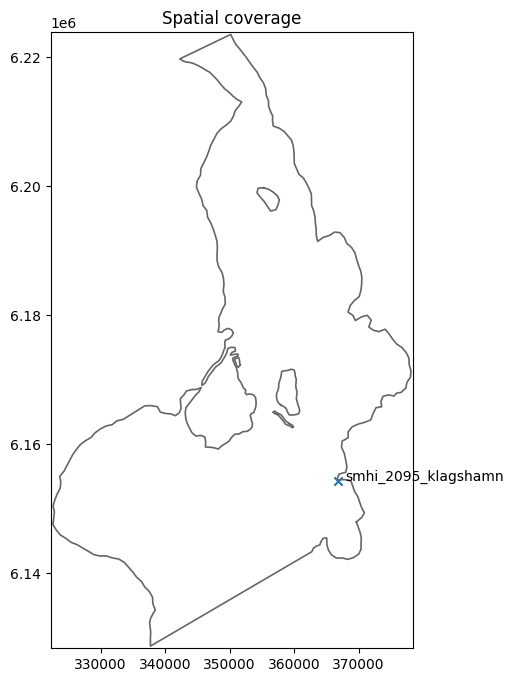

In [12]:
ms.plotting.spatial_overview(o1, mr, figsize=(8, 8));

In [13]:
cc = ms.compare(o1, mr)
cc

C:\Users\rywm\Repos\modelskill\modelskill\comparison\_comparison.py:301: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby(by=by).apply(calc_metrics)


<ComparerCollection>
Comparer: smhi_2095_klagshamn

Most use cases will compare many observed locations to a one or more models.

In this case we only have one observed location.

In [14]:
# get the first and only comparer from the collection
cmp = cc[0]

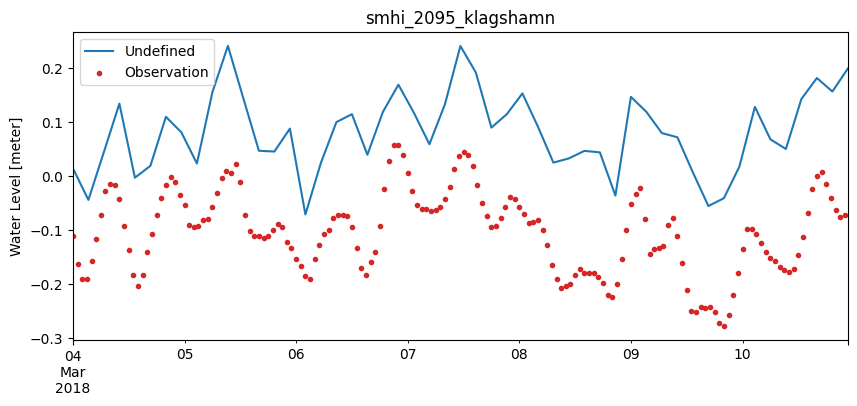

In [15]:
cmp.plot.timeseries(figsize=(10,4));

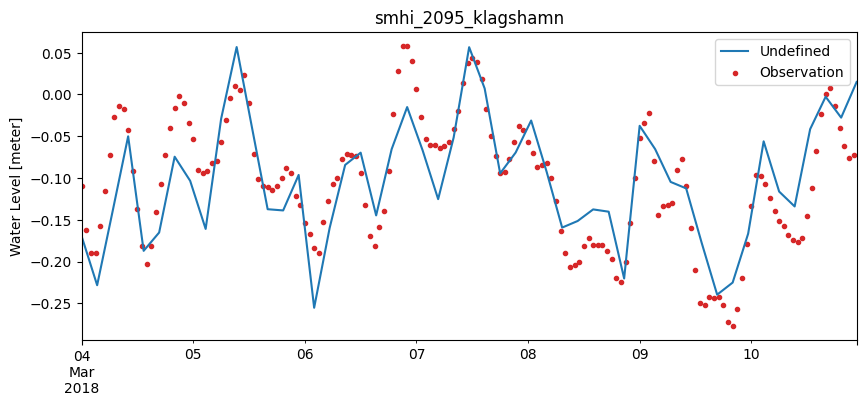

In [16]:
cmp.remove_bias()
cmp.plot.timeseries(figsize=(10,4));

/home/jan/src/modelskill/modelskill/comparison/_comparison.py:1468: FutureWarning: residual_hist is deprecated. Use plot.residual_hist instead.
  warnings.warn(


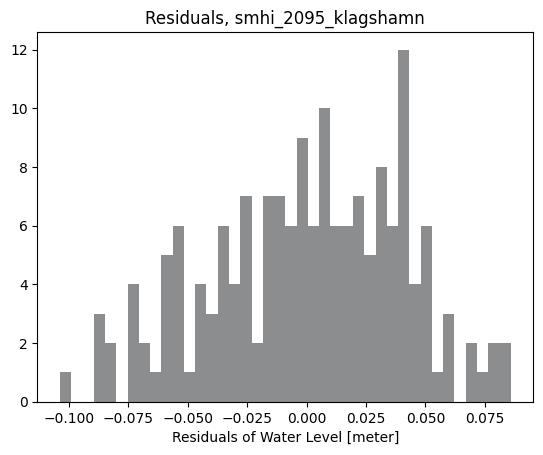

In [17]:
cmp.residual_hist(bins=40);

Get skill for a commonly used set of metrics

In [18]:
cmp.skill()

C:\Users\rywm\Repos\modelskill\modelskill\comparison\_comparison.py:301: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby(by=by).apply(calc_metrics)


,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
smhi_2095_klagshamn,167,1.033099e-09,0.040645,0.040645,0.033226,0.841135,0.376413,0.706335


Or choose specific metrics

In [19]:
cmp.metrics = ["bias","rmse"]
cmp.skill()

C:\Users\rywm\Repos\modelskill\modelskill\comparison\_comparison.py:301: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby(by=by).apply(calc_metrics)


,n,bias,rmse
observation,,,
smhi_2095_klagshamn,167,1.033099e-09,0.040645


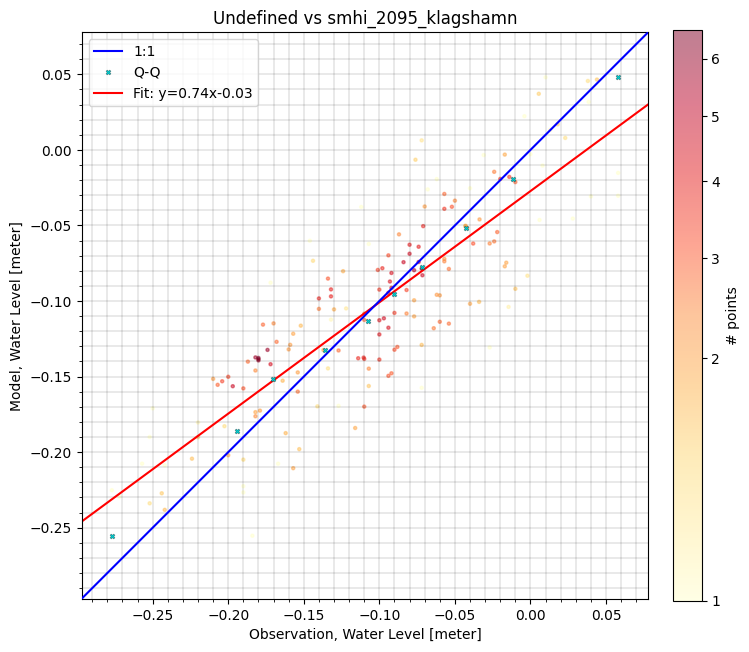

In [20]:
cmp.plot.scatter(bins=0.02, cmap='YlOrRd', show_points=True);

C:\Users\rywm\Repos\modelskill\modelskill\comparison\_comparison.py:301: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby(by=by).apply(calc_metrics)


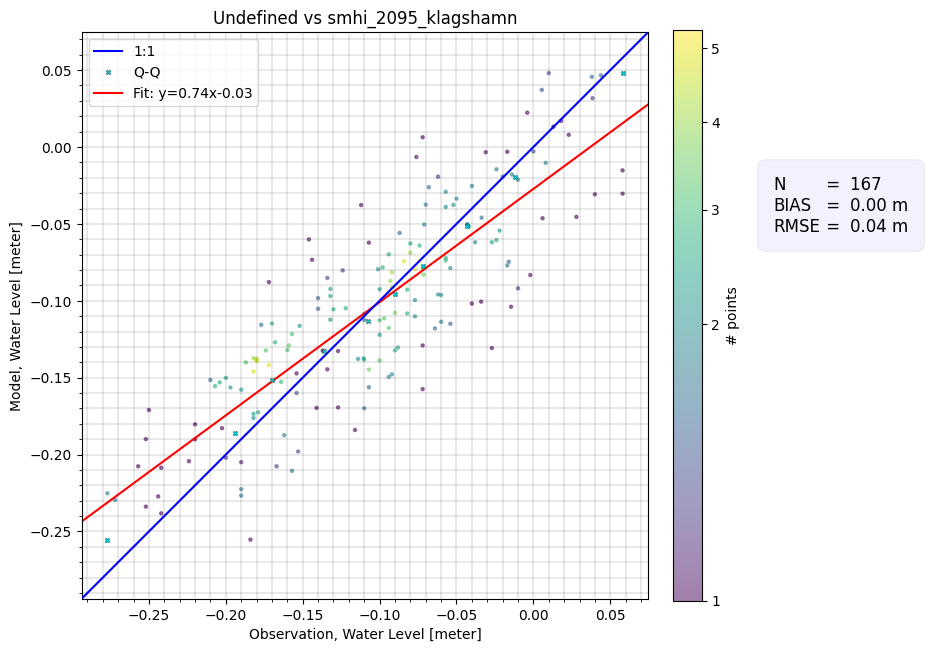

In [21]:
cmp.plot.scatter(skill_table=True, show_points=True);